In [1]:
# installing micrograd- only need to do this once, hence commented out
!pip install micrograd

In [2]:
# import for below exercise. note this needs to stay commented out for the cells below to create the Value object from scratch.
# from micrograd.engine import Value

In [3]:
# simple arithmetic using micrograd, which is scaler-form autograd. note this cell will produce an error without the import.
# a = Value(-4.0)
# b = Value(2.0)
# c = a + b    # -2
# print (c)
# d = a * b + b**3    # 0
# print (d)
# c += c + 1     # -3
# print (c)
# c += 1 + c + (-a)    # -1
# print (c)
# d += d * 2 + (b + a).relu()    # 0
# print (d)
# d += 3 * d + (b-a).relu()    # 6
# print (d)
# e = c - d    # -1 - 6 = -7
# print (e)
# f = e**2    # 49
# print (f)
# g = f / 2.0    # 24.5
# print (g)
# g += 10.0 / f    # 24.704
# print (f'{g.data:.3f}')
# g.backward() # derivative of g with respect of all internal nodes (c,d,e) and inputs (a,b)
# print (f'{a.grad:.3f}')
# print (f'{b.grad:.3f}')

In [4]:
# neural networks- input data, weights of NN as inputs (math expression); outputs: predictions/loss function

In [5]:
# additional imports
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# takes in scaler x, returns scaler y
def f(x) :
    return 3 * x ** 2 - 4*x + 5

In [7]:
f(3.0)

20.0

In [8]:
# sample of x values
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [9]:
# applying function to x values
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

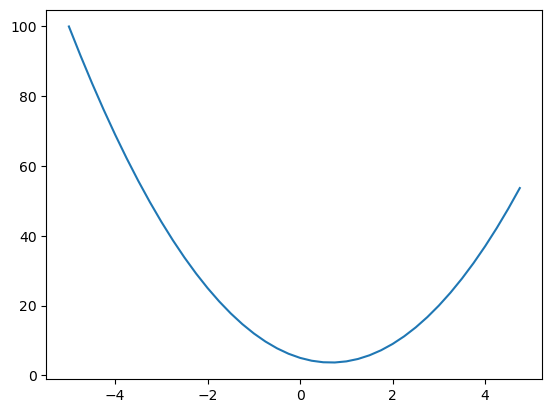

In [10]:
plt.plot(xs, ys)

In [11]:
# note derivative is the limit as h approaches 0.
h = 0.001 # select small h
x = 3.0
f(x + h)

20.014003000000002

In [12]:
(f(x + h) - f(x)) / h # positive as f(x) is parabolic

14.00300000000243

In [13]:
h = 0.00000001
(f(x + h) - f(x)) / h

14.00000009255109

In [14]:
x = -3.0
(f(x + h) - f(x)) / h # negative

-22.00000039920269

In [15]:
h = 0.000001
x = 2/3
(f(x + h) - f(x)) / h

2.999378523327323e-06

In [16]:
# more complex

# inputs
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [17]:
h = 0.0001

# inputs
d1 = a * b + c
a += h
d2 = a * b + c

print('d1: ', d1)
print('d2: ', d2) # d2 < d1
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


In [18]:
# bumping b instead of a
a -= h
b += h
d2 = a * b + c

print('d1: ', d1)
print('d2: ', d2) # d2 < d1
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0002
slope:  2.0000000000042206


In [19]:
# bumping c instead of b
b -= h
c += h
d2 = a * b + c

print('d1: ', d1)
print('d2: ', d2) # d2 < d1
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


In [20]:
# building Value object
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # gradient
        self._backward = lambda : None # base case: child node, backprop function
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
 
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1.0 - t**2) * out.grad
        out._backward = _backward
        
        return out

In [21]:
# forward pass, building out mathematical expression
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
a + b

Value(data=-1.0)

In [22]:
a * b

Value(data=-6.0)

In [23]:
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e +c; d.label = 'd'        # d = a * b + c
d

Value(data=4.0)

In [24]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [25]:
d._op

'+'

In [26]:
!pip install graphviz

In [27]:
from graphviz import Digraph

def trace(root):
    # builds set of nodes/edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # rankdir is rank direction, LR is left -> right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for each node/value in graph, draw a visual record (table-like box) node
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        # if node/value is a result of an operation, create op node
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            # connect reult node to op node
            dot.edge(uid + n._op, uid)

    # connect n1 to op node of n2
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

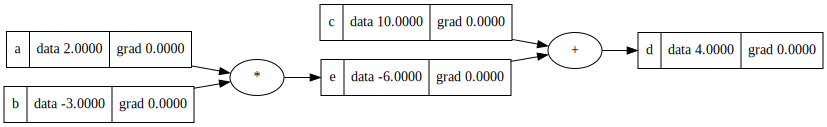

In [28]:
draw_dot(d)

In [29]:
f = Value(-2.0, label='f')
L = d*f; L.label='L' # evaluating to L (loss function), output of forward pass is -8

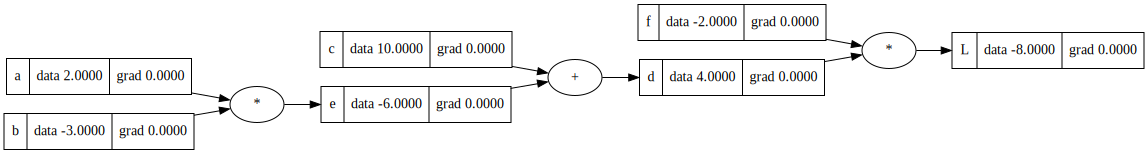

In [30]:
draw_dot(L)

In [31]:
# backpropagation- calculate gradient along intermediate values, compute their derivative in respect to output
# derivative of loss function in respect to NN weights

In [32]:
# fill in gradients manually/ manual backpropagation

def backprop_base_case():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data + h

    print ((L2 - L1)/h)

In [33]:
backprop_base_case()

1.000000000000334


In [34]:
L.grad = 1.0 

In [35]:
def backprop_chg_a_by_h():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.0001
    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [36]:
backprop_chg_a_by_h()

6.000000000021544


In [37]:
# gradient checks, derivatives of child nodes
def dL_dd():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    d.data +=h
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [38]:
def dL_df():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    f = Value(-2.0 + h, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [39]:
dL_dd()

-2.000000000000668


In [40]:
dL_df()

3.9999999999995595


In [41]:
d.grad = -2.0
f.grad = 4.0

In [42]:
def dL_dc():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0+h, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [43]:
def dL_de():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    e.data +=h
    d = e +c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [44]:
dL_dc()

-1.9999999999988916


In [45]:
dL_de()

-2.000000000000668


In [46]:
# think about child "plus" nodes as having local derivatives of one via chain rule, "inherit" parent derivative
c.grad = -2.0
e.grad = -2.0

In [47]:
def dL_da():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [48]:
def dL_db():

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e +c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print ((L2 - L1)/h)

In [49]:
dL_da()

6.000000000000227


In [50]:
dL_db()

-3.9999999999995595


In [51]:
# think "multiply" nodes as parent derivative * other factor via chain rule
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

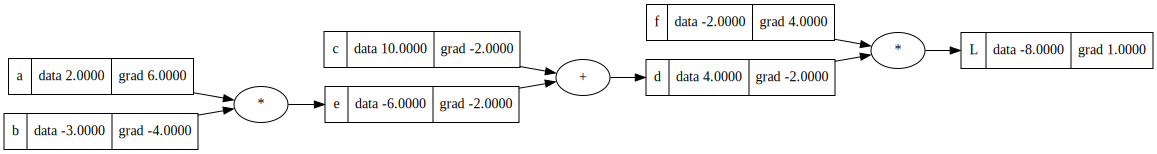

In [52]:
# updated visualization of all nodes and gradients, as well as gradient of loss function
draw_dot(L)

In [53]:
# optimization step
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
 
e = a * b
d = e + c
L = d * f

In [54]:
print(L.data)

-7.286496


In [55]:
# NN contains hidden layers of neurons
# use tanh "squashing" function

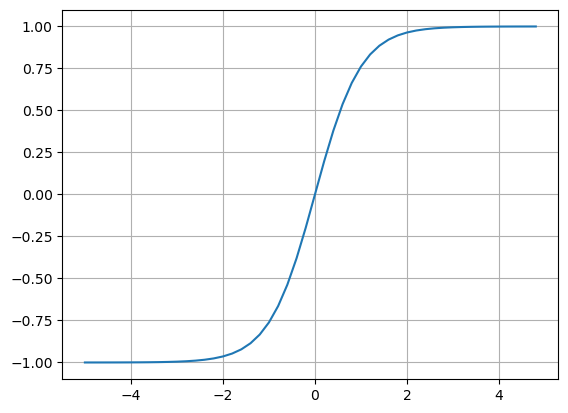

In [56]:
# graph of tanh function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

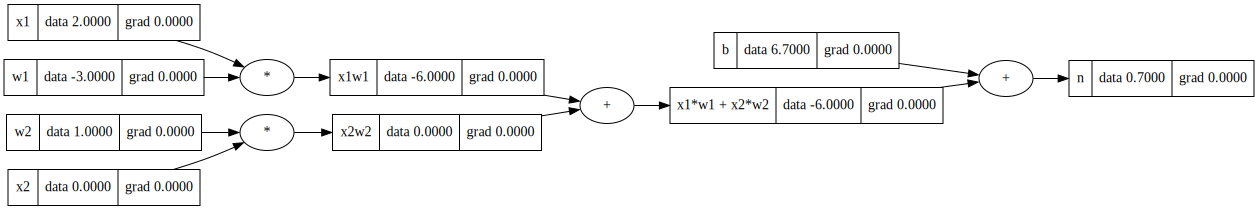

In [57]:
# 2-D neuron with inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights as w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of neuron
b = Value(6.7 , label = 'b')
# x1 * w1 + x2*w2 + b: weighted sum/linear combination
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
draw_dot(n)

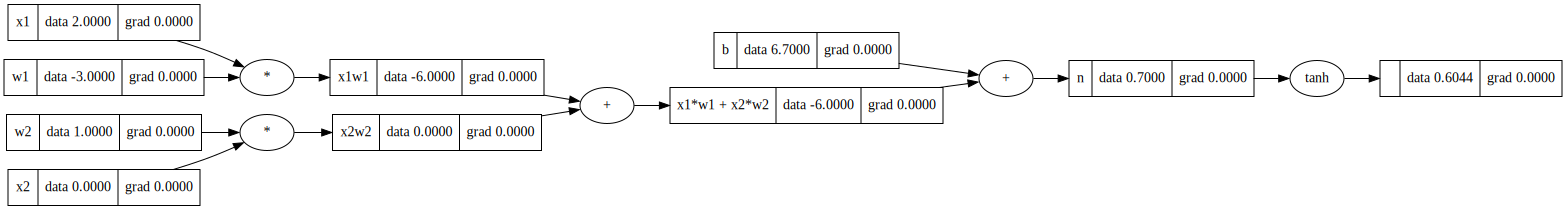

In [58]:
o = n.tanh()
draw_dot(o)

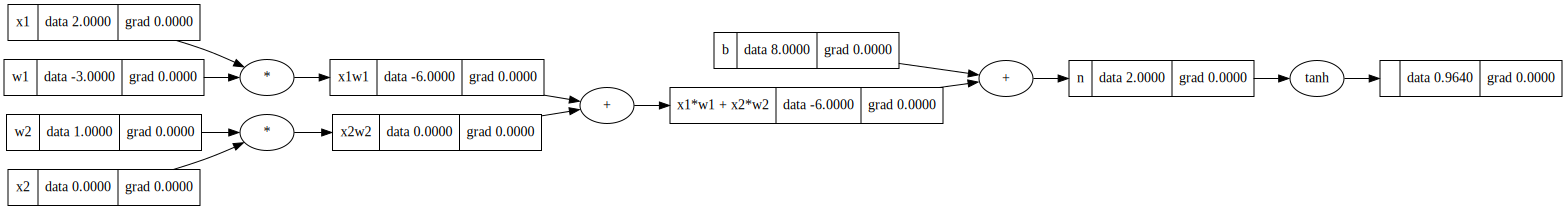

In [59]:
# increase bias -> tanh will have greater effect
b.data = 8.0
n.data = x1w1x2w2.data + b.data
o = n.tanh()
draw_dot(o)

In [60]:
# for number simplicity upon visualization.
b.data = 6.8813735870195432
n.data = x1w1x2w2.data + b.data
o = n.tanh(); o.label = 'o'

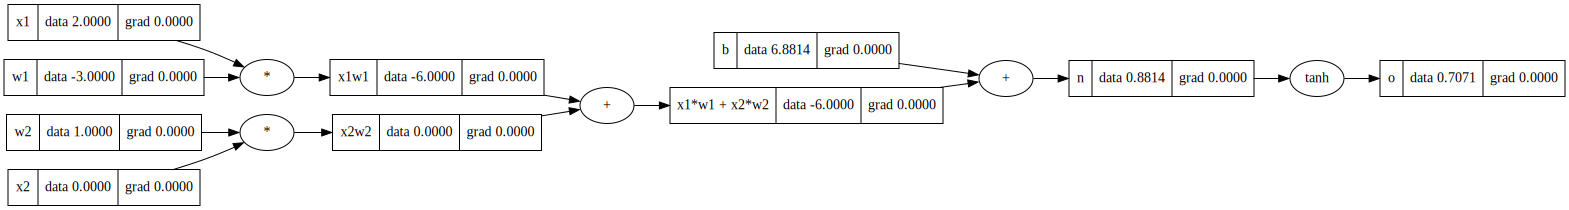

In [61]:
draw_dot(o)

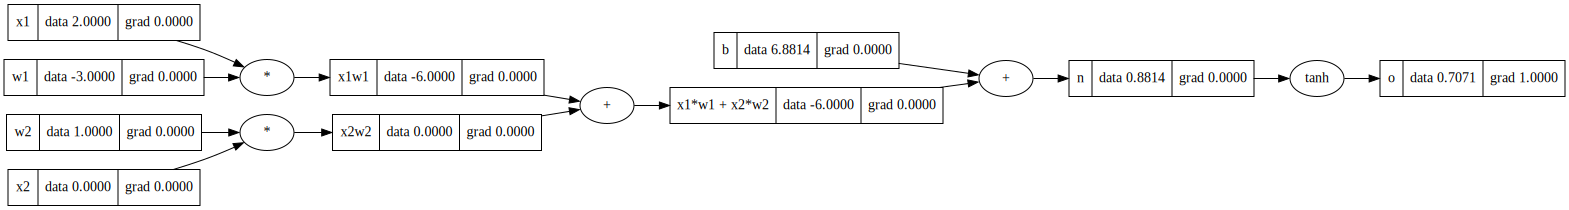

In [62]:
# by default
o.grad = 1.0
draw_dot(o)

In [63]:
o.data

0.7071067811865476

In [64]:
# do/dn = 1- o^2
1 - o.data**2

0.4999999999999999

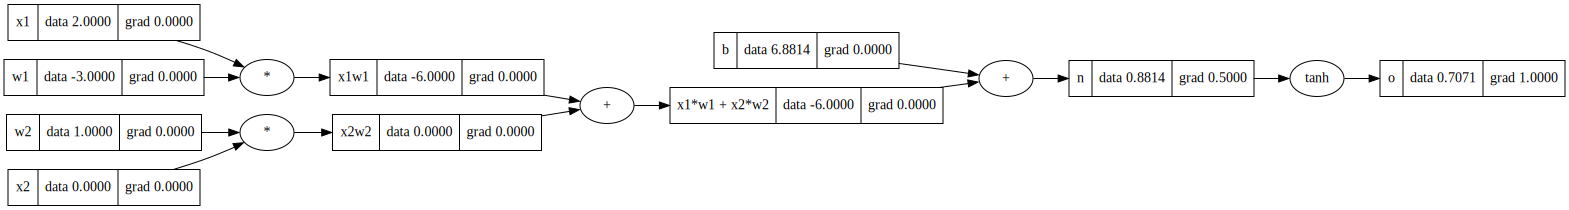

In [65]:
n.grad = 0.5
draw_dot(o)

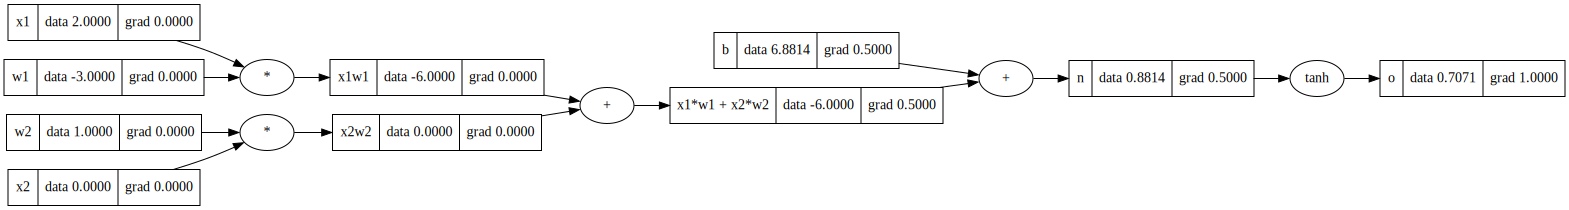

In [66]:
# via plus node
x1w1x2w2.grad = 0.5
b.grad = 0.5
draw_dot(o)

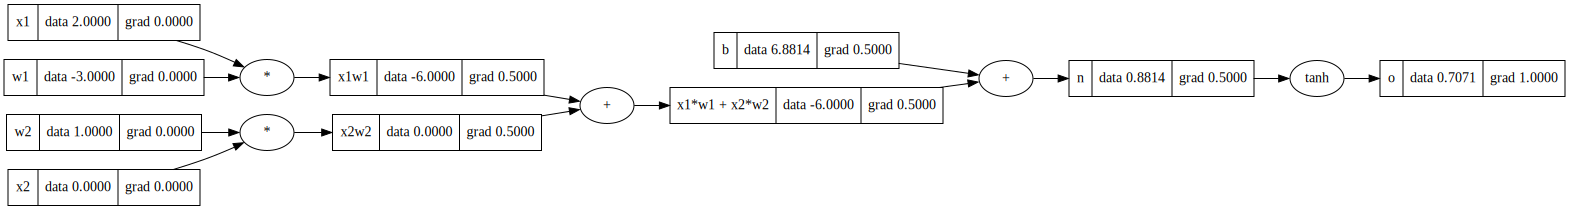

In [67]:
# " "
x1w1.grad = 0.5
x2w2.grad = 0.5
draw_dot(o)

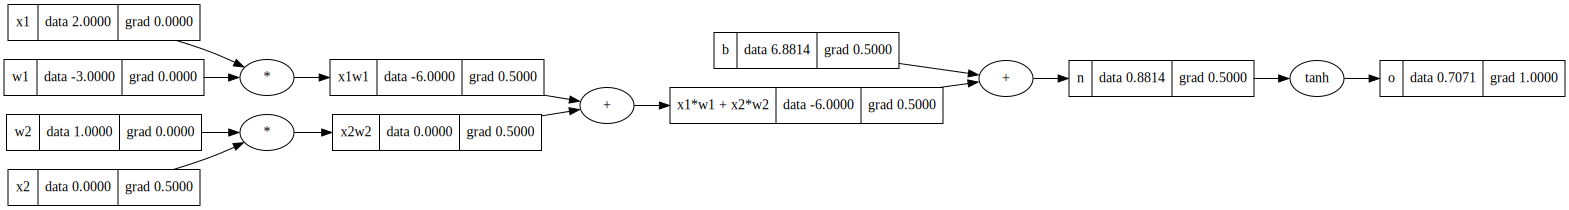

In [68]:
# via multiply node
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
draw_dot(o)

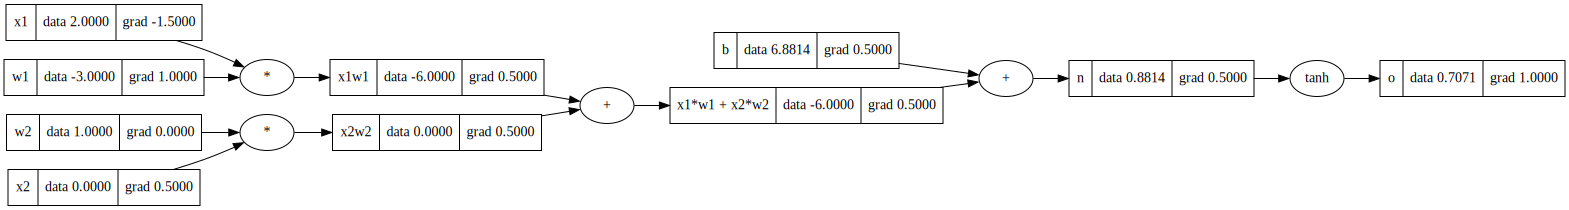

In [69]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
draw_dot(o)

In [70]:
# redefine with gradients of zero with exception of o.grad- using automatic backpropagation via Value object
o.grad = 1.0
n.grad = 0.0000
b.grad = 0.0000
x1w1x2w2.grad = 0.0000
x2w2.grad = 0.0000
x1w1.grad = 0.0000
x2.grad = 0.0000
w2.grad = 0.0000
x1.grad = 0.0000
w1.grad = 0.0000

o._backward()
draw_dot(o)

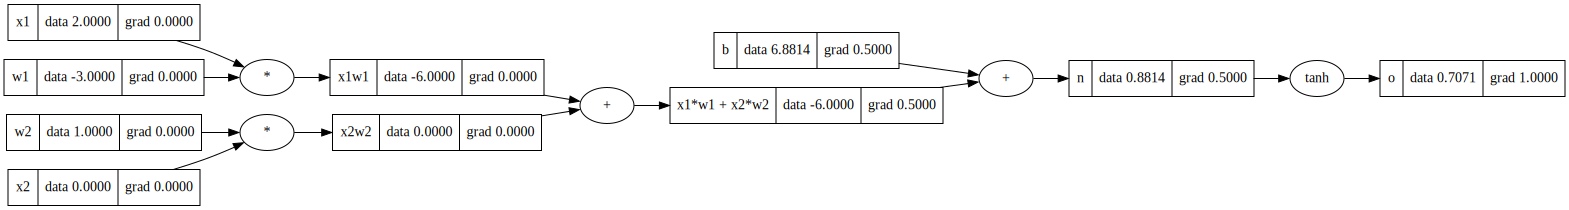

In [72]:
n._backward()
draw_dot(o)

In [ ]:
# does nothing by default via lambda
b._backward()

In [ ]:
x1w1x2w2._backward()
draw_dot(o)

In [73]:
x1w1._backward()
x2w2._backward()

In [ ]:
draw_dot(o)